# Decentralised Load Forecasting with Graph Neural Networks and Edge AI

Name: Kevin Fastje  
Student ID: a1933491

## Assignment 2: Part B – Big Data Analysis

In [1]:
import pandas as pd
import os
import networkx as nx
from functools import reduce
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### 1. Loading and Cleaning Data

#### NUTS2 Datasets

In [2]:
# Loading the dataset and get first insights
distance_df = pd.read_csv('/Users/kevin/OneDrive - University of Adelaide/MAIML/7209 Big Data Analysis and Project/Robust-Capacity-Expansion-main/InputData/Distances/Distances_NUTS2_DE.csv', index_col=0)
print('Shape:', distance_df.shape)
print('Columns:', distance_df.columns.tolist())
distance_df.head()

Shape: (38, 38)
Columns: ['DE11', 'DE12', 'DE13', 'DE14', 'DE21', 'DE22', 'DE23', 'DE24', 'DE25', 'DE26', 'DE27', 'DE30', 'DEC0', 'DED2', 'DED4', 'DED5', 'DEE0', 'DEF0', 'DEG0', 'DE40', 'DE50', 'DE60', 'DE71', 'DE72', 'DE73', 'DE80', 'DE91', 'DE92', 'DE93', 'DE94', 'DEA1', 'DEA2', 'DEA3', 'DEA4', 'DEA5', 'DEB1', 'DEB2', 'DEB3']


,DE11,DE12,DE13,DE14,DE21,DE22,DE23,DE24,DE25,DE26,...,DE93,DE94,DEA1,DEA2,DEA3,DEA4,DEA5,DEB1,DEB2,DEB3
index,,,,,,,,,,,,,,,,,,,,,
DE11,0.00,68.99,151.48,99.63,187.90,235.27,187.33,171.22,92.74,112.25,...,462.96,454.23,344.22,284.76,360.92,329.09,279.27,204.78,237.76,131.41
DE12,68.99,0.00,114.90,115.37,248.73,303.73,255.05,227.24,158.61,144.25,...,470.51,441.15,307.68,242.45,338.72,325.07,260.11,161.65,179.90,73.24
DE13,151.48,114.90,0.00,95.66,263.20,346.42,324.87,322.50,239.50,254.31,...,584.55,547.53,397.33,328.38,440.67,436.83,366.06,253.36,244.72,161.64
DE14,99.63,115.37,95.66,0.00,167.97,251.65,238.62,253.95,165.39,211.47,...,562.41,548.42,422.83,357.81,450.11,426.06,369.70,277.01,290.72,187.23
DE21,187.90,248.73,263.20,167.97,0.00,101.50,145.60,218.45,155.58,249.56,...,581.82,607.06,524.57,469.44,528.30,476.02,447.37,391.03,425.31,318.23


In [3]:
# Check for misssing values
missing = distance_df.isnull().sum()
missing[missing > 0]

Series([], dtype: int64)

In [4]:
# Loading the dataset and get first insights
eligibility_df = pd.read_csv('/Users/kevin/OneDrive - University of Adelaide/MAIML/7209 Big Data Analysis and Project/Robust-Capacity-Expansion-main/InputData/Distances/EligibilityNUTS2.csv', index_col=0)
print('Shape:', eligibility_df.shape)
print('Columns:', eligibility_df.columns.tolist())
eligibility_df.head()

Shape: (38, 38)
Columns: ['DE11', 'DE12', 'DE13', 'DE14', 'DE21', 'DE22', 'DE23', 'DE24', 'DE25', 'DE26', 'DE27', 'DE30', 'DE40', 'DE50', 'DE60', 'DE71', 'DE72', 'DE73', 'DE80', 'DE91', 'DE92', 'DE93', 'DE94', 'DEA1', 'DEA2', 'DEA3', 'DEA4', 'DEA5', 'DEB1', 'DEB2', 'DEB3', 'DEC0', 'DED2', 'DED4', 'DED5', 'DEE0', 'DEF0', 'DEG0']


,DE11,DE12,DE13,DE14,DE21,DE22,DE23,DE24,DE25,DE26,...,DEB1,DEB2,DEB3,DEC0,DED2,DED4,DED5,DEE0,DEF0,DEG0
DE11,0,1,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
DE12,1,0,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
DE13,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DE14,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DE21,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Rename "Unnamed: 0" to "index" for consistency
eligibility_df.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
# Check for missing values
missing = eligibility_df.isnull().sum()
print(missing[missing > 0])
# Check the df again
eligibility_df.head()

Series([], dtype: int64)


,DE11,DE12,DE13,DE14,DE21,DE22,DE23,DE24,DE25,DE26,...,DEB1,DEB2,DEB3,DEC0,DED2,DED4,DED5,DEE0,DEF0,DEG0
DE11,0,1,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
DE12,1,0,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
DE13,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DE14,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DE21,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Check for equal columns between eligibility_df and distance_df
unequal_columns = set(eligibility_df.columns) ^ set(distance_df.columns)

print('Unequal columns:')
print(unequal_columns)

Unequal columns:
set()


#### Demand Dataset

In [7]:
# Loading the dataset and get first insights
demand_df = pd.read_csv('/Users/kevin/OneDrive - University of Adelaide/MAIML/7209 Big Data Analysis and Project/Robust-Capacity-Expansion-main/InputData/Demand/El_demand_2050_DE_processed.csv')
print('Shape:', demand_df.shape)
print('Columns:', demand_df.columns.tolist())
demand_df.head()

Shape: (8760, 39)
Columns: ['Unnamed: 0', 'DE11', 'DE12', 'DE13', 'DE14', 'DE21', 'DE22', 'DE23', 'DE24', 'DE25', 'DE26', 'DE27', 'DE30', 'DE40', 'DE50', 'DE60', 'DE71', 'DE72', 'DE73', 'DE80', 'DE91', 'DE92', 'DE93', 'DE94', 'DEA1', 'DEA2', 'DEA3', 'DEA4', 'DEA5', 'DEB1', 'DEB2', 'DEB3', 'DEC0', 'DED2', 'DED4', 'DED5', 'DEE0', 'DEF0', 'DEG0']


,Unnamed: 0,DE11,DE12,DE13,DE14,DE21,DE22,DE23,DE24,DE25,...,DEB1,DEB2,DEB3,DEC0,DED2,DED4,DED5,DEE0,DEF0,DEG0
0,0,3.237,2.329,1.884,1.546,4.780,1.108,0.992,0.768,1.336,...,1.079,0.445,3.221,1.081,1.304,0.937,1.254,3.540,2.336,1.354
1,1,3.189,2.289,1.852,1.532,4.704,1.091,0.981,0.761,1.300,...,1.068,0.443,3.146,1.078,1.282,0.929,1.219,3.473,2.285,1.336
2,2,3.101,2.234,1.803,1.495,4.589,1.068,0.958,0.738,1.256,...,1.045,0.433,3.154,1.069,1.253,0.903,1.204,3.480,2.223,1.297
3,3,3.059,2.214,1.784,1.477,4.549,1.058,0.946,0.727,1.236,...,1.034,0.430,3.152,1.071,1.234,0.887,1.195,3.468,2.184,1.277
4,4,3.042,2.209,1.766,1.468,4.511,1.045,0.933,0.716,1.217,...,1.024,0.427,3.085,1.062,1.213,0.874,1.173,3.386,2.137,1.256


In [8]:
# Add timestamp column
demand_df["timestamp"] = pd.date_range(start="2050-01-01", periods=8760, freq="h")
# Delete the "Unnamed: 0" column
demand_df.drop(columns=["Unnamed: 0"], inplace=True)
# Put the "timestamp" column at the beginning
demand_df = demand_df[["timestamp"] + [col for col in demand_df.columns if col != "timestamp"]]
# Check for missing values
missing = demand_df.isnull().sum()
print(missing[missing > 0])
# Check the df again
demand_df.head()

Series([], dtype: int64)


,timestamp,DE11,DE12,DE13,DE14,DE21,DE22,DE23,DE24,DE25,...,DEB1,DEB2,DEB3,DEC0,DED2,DED4,DED5,DEE0,DEF0,DEG0
0,2050-01-01 00:00:00,3.237,2.329,1.884,1.546,4.780,1.108,0.992,0.768,1.336,...,1.079,0.445,3.221,1.081,1.304,0.937,1.254,3.540,2.336,1.354
1,2050-01-01 01:00:00,3.189,2.289,1.852,1.532,4.704,1.091,0.981,0.761,1.300,...,1.068,0.443,3.146,1.078,1.282,0.929,1.219,3.473,2.285,1.336
2,2050-01-01 02:00:00,3.101,2.234,1.803,1.495,4.589,1.068,0.958,0.738,1.256,...,1.045,0.433,3.154,1.069,1.253,0.903,1.204,3.480,2.223,1.297
3,2050-01-01 03:00:00,3.059,2.214,1.784,1.477,4.549,1.058,0.946,0.727,1.236,...,1.034,0.430,3.152,1.071,1.234,0.887,1.195,3.468,2.184,1.277
4,2050-01-01 04:00:00,3.042,2.209,1.766,1.468,4.511,1.045,0.933,0.716,1.217,...,1.024,0.427,3.085,1.062,1.213,0.874,1.173,3.386,2.137,1.256


In [9]:
demand_df.tail()

,timestamp,DE11,DE12,DE13,DE14,DE21,DE22,DE23,DE24,DE25,...,DEB1,DEB2,DEB3,DEC0,DED2,DED4,DED5,DEE0,DEF0,DEG0
8755,2050-12-31 19:00:00,4.595,3.283,2.677,2.055,6.502,1.495,1.290,1.008,1.895,...,1.591,0.628,3.928,1.358,1.701,1.319,1.584,4.104,3.100,1.775
8756,2050-12-31 20:00:00,4.392,3.163,2.578,1.982,6.247,1.457,1.249,0.970,1.808,...,1.545,0.606,3.956,1.334,1.642,1.288,1.552,4.161,2.984,1.711
8757,2050-12-31 21:00:00,4.211,3.050,2.494,1.922,6.000,1.431,1.208,0.937,1.718,...,1.513,0.584,4.068,1.290,1.583,1.277,1.543,4.323,2.887,1.656
8758,2050-12-31 22:00:00,4.080,2.928,2.405,1.868,5.711,1.377,1.177,0.905,1.647,...,1.453,0.563,3.745,1.274,1.529,1.234,1.442,3.997,2.722,1.599
8759,2050-12-31 23:00:00,3.870,2.803,2.291,1.781,5.390,1.319,1.124,0.860,1.558,...,1.392,0.536,3.915,1.237,1.457,1.181,1.441,4.207,2.616,1.525


#### Photovoltaik (PV) Datasets

In [10]:
# Loading the dataset and get first insights
maxcap_openfieldpv_df = pd.read_csv('/Users/kevin/OneDrive - University of Adelaide/MAIML/7209 Big Data Analysis and Project/Robust-Capacity-Expansion-main/InputData/PV/MaxCap_NUTS2_OpenfieldPV.csv')
print('Shape:', maxcap_openfieldpv_df.shape)
print('Columns:', maxcap_openfieldpv_df.columns.tolist())
maxcap_openfieldpv_df.head()

Shape: (38, 2)
Columns: ['Unnamed: 0', 'Cap_max_GW']


,Unnamed: 0,Cap_max_GW
0,DEF0,17.266
1,DE60,0.386
2,DE91,7.146
3,DE92,9.564
4,DE93,15.981


In [11]:
# Rename "Unnamed: 0" to "region"
maxcap_openfieldpv_df.rename(columns={'Unnamed: 0': 'region'}, inplace=True)
# Check for missing values
missing = maxcap_openfieldpv_df.isnull().sum()
print(missing[missing > 0])
# Check the df again
maxcap_openfieldpv_df.head()

Series([], dtype: int64)


,region,Cap_max_GW
0,DEF0,17.266
1,DE60,0.386
2,DE91,7.146
3,DE92,9.564
4,DE93,15.981


In [12]:
# Loading the dataset and get first insights
maxcap_rooftoppv_df = pd.read_csv('/Users/kevin/OneDrive - University of Adelaide/MAIML/7209 Big Data Analysis and Project/Robust-Capacity-Expansion-main/InputData/PV/MaxCap_NUTS2_RoofTopPV.csv')
print('Shape:', maxcap_rooftoppv_df.shape)
print('Columns:', maxcap_rooftoppv_df.columns.tolist())
maxcap_rooftoppv_df.head()

Shape: (38, 2)
Columns: ['Unnamed: 0', 'Cap_max_GW']


,Unnamed: 0,Cap_max_GW
0,DEF0,20.521
1,DE60,5.612
2,DE91,10.381
3,DE92,14.010
4,DE93,14.897


In [13]:
# Rename "Unnamed: 0" to "region"
maxcap_rooftoppv_df.rename(columns={'Unnamed: 0': 'region'}, inplace=True)
# Check for missing values
missing = maxcap_rooftoppv_df.isnull().sum()
print(missing[missing > 0])
# Check the df again
maxcap_rooftoppv_df.head()

Series([], dtype: int64)


,region,Cap_max_GW
0,DEF0,20.521
1,DE60,5.612
2,DE91,10.381
3,DE92,14.010
4,DE93,14.897


In [14]:
# Load a single year of PV data
pvdata_2014_df = pd.read_csv('/Users/kevin/OneDrive - University of Adelaide/MAIML/7209 Big Data Analysis and Project/Robust-Capacity-Expansion-main/InputData/PV/PVdata2014.csv')
print('Shape:', pvdata_2014_df.shape)
print('Columns:', pvdata_2014_df.columns.tolist())
print(pvdata_2014_df.info())
pvdata_2014_df.head()

Shape: (8760, 39)
Columns: ['Unnamed: 0', 'DE11', 'DE12', 'DE13', 'DE14', 'DE21', 'DE22', 'DE23', 'DE24', 'DE25', 'DE26', 'DE27', 'DE30', 'DE40', 'DE50', 'DE60', 'DE71', 'DE72', 'DE73', 'DE80', 'DE91', 'DE92', 'DE93', 'DE94', 'DEA1', 'DEA2', 'DEA3', 'DEA4', 'DEA5', 'DEB1', 'DEB2', 'DEB3', 'DEC0', 'DED2', 'DED4', 'DED5', 'DEE0', 'DEF0', 'DEG0']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8760 non-null   int64  
 1   DE11        8760 non-null   float64
 2   DE12        8760 non-null   float64
 3   DE13        8760 non-null   float64
 4   DE14        8760 non-null   float64
 5   DE21        8760 non-null   float64
 6   DE22        8760 non-null   float64
 7   DE23        8760 non-null   float64
 8   DE24        8760 non-null   float64
 9   DE25        8760 non-null   float64
 10  DE26        8760 non-null   float64
 11  DE27     

,Unnamed: 0,DE11,DE12,DE13,DE14,DE21,DE22,DE23,DE24,DE25,...,DEB1,DEB2,DEB3,DEC0,DED2,DED4,DED5,DEE0,DEF0,DEG0
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Function to load and combine data for multiple years
def load_data(name, years, data_dir):
    dfs = []

    for year in years:
        filename = f'{name}{year}.csv'
        filepath = os.path.join(data_dir, filename)

        df = pd.read_csv(filepath)

        # Add timestamp column
        df["timestamp"] = pd.date_range(start=f'{year}-01-01', periods=8760, freq='h')
        # Delete the "Unnamed: 0" column
        df.drop(columns=["Unnamed: 0"], inplace=True)
        # Put the "timestamp" column at the beginning
        df = df[["timestamp"] + [col for col in df.columns if col != "timestamp"]]

        dfs.append(df)

    dataset = pd.concat(dfs)

    return dataset

In [16]:
# PVdata loading and combining

data_dir = '/Users/kevin/OneDrive - University of Adelaide/MAIML/7209 Big Data Analysis and Project/Robust-Capacity-Expansion-main/InputData/PV'
years = range(1980, 2020)
name = 'PVdata'

pv_df = load_data(name, years, data_dir)

print('Shape:', pv_df.shape)
print('Columns:', pv_df.columns.tolist())
pv_df.head()


Shape: (350400, 39)
Columns: ['timestamp', 'DE11', 'DE12', 'DE13', 'DE14', 'DE21', 'DE22', 'DE23', 'DE24', 'DE25', 'DE26', 'DE27', 'DE30', 'DE40', 'DE50', 'DE60', 'DE71', 'DE72', 'DE73', 'DE80', 'DE91', 'DE92', 'DE93', 'DE94', 'DEA1', 'DEA2', 'DEA3', 'DEA4', 'DEA5', 'DEB1', 'DEB2', 'DEB3', 'DEC0', 'DED2', 'DED4', 'DED5', 'DEE0', 'DEF0', 'DEG0']


,timestamp,DE11,DE12,DE13,DE14,DE21,DE22,DE23,DE24,DE25,...,DEB1,DEB2,DEB3,DEC0,DED2,DED4,DED5,DEE0,DEF0,DEG0
0,1980-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1980-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1980-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1980-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1980-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Check for missing values
missing = pv_df.isnull().sum()
print(missing[missing > 0])
# Check the df again
pv_df.tail()

Series([], dtype: int64)


,timestamp,DE11,DE12,DE13,DE14,DE21,DE22,DE23,DE24,DE25,...,DEB1,DEB2,DEB3,DEC0,DED2,DED4,DED5,DEE0,DEF0,DEG0
8755,2019-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8756,2019-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8757,2019-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8758,2019-12-31 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8759,2019-12-31 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
pv_df.describe()

,timestamp,DE11,DE12,DE13,DE14,DE21,DE22,DE23,DE24,DE25,...,DEB1,DEB2,DEB3,DEC0,DED2,DED4,DED5,DEE0,DEF0,DEG0
count,350400,350400.000000,350400.000000,350400.000000,350400.000000,350400.000000,350400.000000,350400.000000,350400.000000,350400.000000,...,350400.000000,350400.000000,350400.000000,350400.000000,350400.000000,350400.000000,350400.000000,350400.000000,350400.000000,350400.000000
mean,2000-01-01 05:30:00.000000128,0.132243,0.130655,0.135702,0.135880,0.134154,0.132843,0.131411,0.128687,0.129958,...,0.127162,0.126825,0.128843,0.127581,0.127337,0.127179,0.126644,0.123660,0.117238,0.126459
min,1980-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989-12-31 23:45:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1999-12-31 23:30:00,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.000000,0.001000,...,0.000000,0.000000,0.000000,0.000000,0.001000,0.001000,0.001000,0.001000,0.000000,0.001000
75%,2009-12-31 23:15:00,0.228000,0.222000,0.235000,0.238000,0.234000,0.228000,0.222000,0.210000,0.222000,...,0.208000,0.204000,0.216000,0.206000,0.209000,0.212000,0.208000,0.204000,0.181000,0.209000
max,2019-12-31 23:00:00,0.778000,0.771000,0.790000,0.788000,0.779000,0.775000,0.776000,0.779000,0.769000,...,0.777000,0.773000,0.766000,0.774000,0.765000,0.761000,0.753000,0.743000,0.749000,0.764000
std,NaN,0.196058,0.194838,0.199959,0.198731,0.196344,0.195807,0.196032,0.195074,0.194015,...,0.193718,0.195094,0.192995,0.195570,0.192356,0.191717,0.190986,0.186364,0.183317,0.190853


#### Wind Datasets

In [19]:
# Loading the dataset and get first insights
maxcap_windoffshore_df = pd.read_csv('/Users/kevin/OneDrive - University of Adelaide/MAIML/7209 Big Data Analysis and Project/Robust-Capacity-Expansion-main/InputData/WindOffshore/MaxCap_NUTS2_WindOffshore.csv')
print('Shape:', maxcap_windoffshore_df.shape)
print('Columns:', maxcap_windoffshore_df.columns.tolist())
maxcap_windoffshore_df.head()

Shape: (38, 2)
Columns: ['Unnamed: 0', 'Cap_max_GW']


,Unnamed: 0,Cap_max_GW
0,DEF0,12.65
1,DE60,0.00
2,DE91,0.00
3,DE92,0.00
4,DE93,12.65


In [20]:
# Rename "Unnamed: 0" to "region"
maxcap_windoffshore_df.rename(columns={'Unnamed: 0': 'region'}, inplace=True)
# Check for missing values
missing = maxcap_windoffshore_df.isnull().sum()
print(missing[missing > 0])
# Check the df again
maxcap_windoffshore_df.head()

Series([], dtype: int64)


,region,Cap_max_GW
0,DEF0,12.65
1,DE60,0.00
2,DE91,0.00
3,DE92,0.00
4,DE93,12.65


In [21]:
# Load a single year of Offshoredata
offshore_2014_df = pd.read_csv('/Users/kevin/OneDrive - University of Adelaide/MAIML/7209 Big Data Analysis and Project/Robust-Capacity-Expansion-main/InputData/WindOffshore/Offshoredata2014.csv')
print('Shape:', offshore_2014_df.shape)
print('Columns:', offshore_2014_df.columns.tolist())
print(offshore_2014_df.info())
offshore_2014_df.head()

Shape: (8760, 39)
Columns: ['Unnamed: 0', 'DEF0', 'DE60', 'DE91', 'DE92', 'DE93', 'DE94', 'DE50', 'DEA1', 'DEA2', 'DEA3', 'DEA4', 'DEA5', 'DE71', 'DE72', 'DE73', 'DEB1', 'DEB2', 'DEB3', 'DE11', 'DE12', 'DE13', 'DE14', 'DE21', 'DE22', 'DE23', 'DE24', 'DE25', 'DE26', 'DE27', 'DEC0', 'DE30', 'DE40', 'DE80', 'DED4', 'DED2', 'DED5', 'DEE0', 'DEG0']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8760 non-null   int64  
 1   DEF0        8760 non-null   float64
 2   DE60        8760 non-null   float64
 3   DE91        8760 non-null   float64
 4   DE92        8760 non-null   float64
 5   DE93        8760 non-null   float64
 6   DE94        8760 non-null   float64
 7   DE50        8760 non-null   float64
 8   DEA1        8760 non-null   float64
 9   DEA2        8760 non-null   float64
 10  DEA3        8760 non-null   float64
 11  DEA4     

,Unnamed: 0,DEF0,DE60,DE91,DE92,DE93,DE94,DE50,DEA1,DEA2,...,DE27,DEC0,DE30,DE40,DE80,DED4,DED2,DED5,DEE0,DEG0
0,0,0.417,0.417,0.417,0.417,0.417,0.417,0.417,0.417,0.417,...,0.417,0.417,0.417,0.417,0.417,0.417,0.417,0.417,0.417,0.417
1,1,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,...,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
2,2,0.328,0.328,0.328,0.328,0.328,0.328,0.328,0.328,0.328,...,0.328,0.328,0.328,0.328,0.328,0.328,0.328,0.328,0.328,0.328
3,3,0.300,0.300,0.300,0.300,0.300,0.300,0.300,0.300,0.300,...,0.300,0.300,0.300,0.300,0.300,0.300,0.300,0.300,0.300,0.300
4,4,0.303,0.303,0.303,0.303,0.303,0.303,0.303,0.303,0.303,...,0.303,0.303,0.303,0.303,0.303,0.303,0.303,0.303,0.303,0.303


In [22]:
# Offshoredata loading and combining

data_dir = '/Users/kevin/OneDrive - University of Adelaide/MAIML/7209 Big Data Analysis and Project/Robust-Capacity-Expansion-main/InputData/WindOffshore'
years = range(1980, 2020)
name = 'Offshoredata'

offshore_df = load_data(name, years, data_dir)

print('Shape:', offshore_df.shape)
print('Columns:', offshore_df.columns.tolist())
offshore_df.head()


Shape: (350400, 39)
Columns: ['timestamp', 'DEF0', 'DE60', 'DE91', 'DE92', 'DE93', 'DE94', 'DE50', 'DEA1', 'DEA2', 'DEA3', 'DEA4', 'DEA5', 'DE71', 'DE72', 'DE73', 'DEB1', 'DEB2', 'DEB3', 'DE11', 'DE12', 'DE13', 'DE14', 'DE21', 'DE22', 'DE23', 'DE24', 'DE25', 'DE26', 'DE27', 'DEC0', 'DE30', 'DE40', 'DE80', 'DED4', 'DED2', 'DED5', 'DEE0', 'DEG0']


,timestamp,DEF0,DE60,DE91,DE92,DE93,DE94,DE50,DEA1,DEA2,...,DE27,DEC0,DE30,DE40,DE80,DED4,DED2,DED5,DEE0,DEG0
0,1980-01-01 00:00:00,0.425,0.425,0.425,0.425,0.425,0.425,0.425,0.425,0.425,...,0.425,0.425,0.425,0.425,0.425,0.425,0.425,0.425,0.425,0.425
1,1980-01-01 01:00:00,0.421,0.421,0.421,0.421,0.421,0.421,0.421,0.421,0.421,...,0.421,0.421,0.421,0.421,0.421,0.421,0.421,0.421,0.421,0.421
2,1980-01-01 02:00:00,0.418,0.418,0.418,0.418,0.418,0.418,0.418,0.418,0.418,...,0.418,0.418,0.418,0.418,0.418,0.418,0.418,0.418,0.418,0.418
3,1980-01-01 03:00:00,0.423,0.423,0.423,0.423,0.423,0.423,0.423,0.423,0.423,...,0.423,0.423,0.423,0.423,0.423,0.423,0.423,0.423,0.423,0.423
4,1980-01-01 04:00:00,0.422,0.422,0.422,0.422,0.422,0.422,0.422,0.422,0.422,...,0.422,0.422,0.422,0.422,0.422,0.422,0.422,0.422,0.422,0.422


In [23]:
# Check for missing values
missing = offshore_df.isnull().sum()
print(missing[missing > 0])
# Check the df again
offshore_df.tail()

Series([], dtype: int64)


,timestamp,DEF0,DE60,DE91,DE92,DE93,DE94,DE50,DEA1,DEA2,...,DE27,DEC0,DE30,DE40,DE80,DED4,DED2,DED5,DEE0,DEG0
8755,2019-12-31 19:00:00,0.105,0.105,0.105,0.105,0.105,0.105,0.105,0.105,0.105,...,0.105,0.105,0.105,0.105,0.105,0.105,0.105,0.105,0.105,0.105
8756,2019-12-31 20:00:00,0.090,0.090,0.090,0.090,0.090,0.090,0.090,0.090,0.090,...,0.090,0.090,0.090,0.090,0.090,0.090,0.090,0.090,0.090,0.090
8757,2019-12-31 21:00:00,0.087,0.087,0.087,0.087,0.087,0.087,0.087,0.087,0.087,...,0.087,0.087,0.087,0.087,0.087,0.087,0.087,0.087,0.087,0.087
8758,2019-12-31 22:00:00,0.092,0.092,0.092,0.092,0.092,0.092,0.092,0.092,0.092,...,0.092,0.092,0.092,0.092,0.092,0.092,0.092,0.092,0.092,0.092
8759,2019-12-31 23:00:00,0.113,0.113,0.113,0.113,0.113,0.113,0.113,0.113,0.113,...,0.113,0.113,0.113,0.113,0.113,0.113,0.113,0.113,0.113,0.113


In [24]:
# Loading the dataset and get first insights
maxcap_windonshore_df = pd.read_csv('/Users/kevin/OneDrive - University of Adelaide/MAIML/7209 Big Data Analysis and Project/Robust-Capacity-Expansion-main/InputData/WindOnshore/MaxCap_NUTS2_WindOnshore.csv')
print('Shape:', maxcap_windonshore_df.shape)
print('Columns:', maxcap_windonshore_df.columns.tolist())
maxcap_windonshore_df.head()

Shape: (38, 2)
Columns: ['Unnamed: 0', 'Cap_max_GW']


,Unnamed: 0,Cap_max_GW
0,DEF0,12.859
1,DE60,0.038
2,DE91,7.525
3,DE92,5.776
4,DE93,17.775


In [25]:
# Rename "Unnamed: 0" to "region"
maxcap_windonshore_df.rename(columns={'Unnamed: 0': 'region'}, inplace=True)
# Check for missing values
missing = maxcap_windonshore_df.isnull().sum()
print(missing[missing > 0])
# Check the df again
maxcap_windonshore_df.head()

Series([], dtype: int64)


,region,Cap_max_GW
0,DEF0,12.859
1,DE60,0.038
2,DE91,7.525
3,DE92,5.776
4,DE93,17.775


In [26]:
# Load a single year of Winddata
onshore_2014_df = pd.read_csv('/Users/kevin/OneDrive - University of Adelaide/MAIML/7209 Big Data Analysis and Project/Robust-Capacity-Expansion-main/InputData/WindOnshore/Winddata2014.csv')
print('Shape:', onshore_2014_df.shape)
print('Columns:', onshore_2014_df.columns.tolist())
print(onshore_2014_df.info())
onshore_2014_df.head()

Shape: (8760, 39)
Columns: ['Unnamed: 0', 'DE11', 'DE12', 'DE13', 'DE14', 'DE21', 'DE22', 'DE23', 'DE24', 'DE25', 'DE26', 'DE27', 'DE30', 'DE40', 'DE50', 'DE60', 'DE71', 'DE72', 'DE73', 'DE80', 'DE91', 'DE92', 'DE93', 'DE94', 'DEA1', 'DEA2', 'DEA3', 'DEA4', 'DEA5', 'DEB1', 'DEB2', 'DEB3', 'DEC0', 'DED2', 'DED4', 'DED5', 'DEE0', 'DEF0', 'DEG0']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8760 non-null   int64  
 1   DE11        8760 non-null   float64
 2   DE12        8760 non-null   float64
 3   DE13        8760 non-null   float64
 4   DE14        8760 non-null   float64
 5   DE21        8760 non-null   float64
 6   DE22        8760 non-null   float64
 7   DE23        8760 non-null   float64
 8   DE24        8760 non-null   float64
 9   DE25        8760 non-null   float64
 10  DE26        8760 non-null   float64
 11  DE27     

,Unnamed: 0,DE11,DE12,DE13,DE14,DE21,DE22,DE23,DE24,DE25,...,DEB1,DEB2,DEB3,DEC0,DED2,DED4,DED5,DEE0,DEF0,DEG0
0,0,0.160,0.332,0.234,0.230,0.062,0.017,0.026,0.183,0.082,...,0.165,0.182,0.214,0.176,0.268,0.220,0.129,0.150,0.463,0.259
1,1,0.226,0.397,0.322,0.286,0.071,0.012,0.023,0.179,0.096,...,0.147,0.157,0.192,0.152,0.257,0.214,0.140,0.153,0.454,0.246
2,2,0.236,0.353,0.313,0.279,0.105,0.012,0.027,0.204,0.124,...,0.133,0.143,0.163,0.138,0.249,0.211,0.143,0.143,0.387,0.205
3,3,0.224,0.294,0.257,0.258,0.127,0.019,0.038,0.197,0.146,...,0.126,0.137,0.142,0.131,0.255,0.204,0.172,0.154,0.361,0.211
4,4,0.218,0.245,0.199,0.254,0.139,0.026,0.041,0.233,0.152,...,0.135,0.158,0.143,0.154,0.277,0.231,0.208,0.168,0.372,0.208


In [27]:
# WindOnshore loading and combining

data_dir = '/Users/kevin/OneDrive - University of Adelaide/MAIML/7209 Big Data Analysis and Project/Robust-Capacity-Expansion-main/InputData/WindOnshore'
years = range(1980, 2020)
name = 'Winddata'

onshore_df = load_data(name, years, data_dir)

print('Shape:', onshore_df.shape)
print('Columns:', onshore_df.columns.tolist())
onshore_df.head()

Shape: (350400, 39)
Columns: ['timestamp', 'DE11', 'DE12', 'DE13', 'DE14', 'DE21', 'DE22', 'DE23', 'DE24', 'DE25', 'DE26', 'DE27', 'DE30', 'DE40', 'DE50', 'DE60', 'DE71', 'DE72', 'DE73', 'DE80', 'DE91', 'DE92', 'DE93', 'DE94', 'DEA1', 'DEA2', 'DEA3', 'DEA4', 'DEA5', 'DEB1', 'DEB2', 'DEB3', 'DEC0', 'DED2', 'DED4', 'DED5', 'DEE0', 'DEF0', 'DEG0']


,timestamp,DE11,DE12,DE13,DE14,DE21,DE22,DE23,DE24,DE25,...,DEB1,DEB2,DEB3,DEC0,DED2,DED4,DED5,DEE0,DEF0,DEG0
0,1980-01-01 00:00:00,0.310,0.298,0.141,0.396,0.427,0.376,0.345,0.244,0.347,...,0.282,0.207,0.279,0.169,0.405,0.364,0.430,0.336,0.018,0.323
1,1980-01-01 01:00:00,0.297,0.268,0.108,0.376,0.488,0.390,0.371,0.272,0.408,...,0.254,0.179,0.237,0.161,0.430,0.302,0.367,0.328,0.024,0.314
2,1980-01-01 02:00:00,0.335,0.266,0.102,0.383,0.507,0.445,0.400,0.299,0.428,...,0.227,0.198,0.207,0.172,0.346,0.296,0.350,0.319,0.032,0.327
3,1980-01-01 03:00:00,0.344,0.276,0.100,0.391,0.507,0.432,0.411,0.319,0.430,...,0.206,0.162,0.219,0.142,0.352,0.294,0.351,0.289,0.045,0.355
4,1980-01-01 04:00:00,0.315,0.262,0.094,0.390,0.473,0.390,0.426,0.342,0.414,...,0.216,0.157,0.223,0.147,0.404,0.293,0.364,0.277,0.074,0.369


In [28]:
# Check for missing values
missing = onshore_df.isnull().sum()
print(missing[missing > 0])
# Check the df again
onshore_df.tail()

Series([], dtype: int64)


,timestamp,DE11,DE12,DE13,DE14,DE21,DE22,DE23,DE24,DE25,...,DEB1,DEB2,DEB3,DEC0,DED2,DED4,DED5,DEE0,DEF0,DEG0
8755,2019-12-31 19:00:00,0.074,0.104,0.091,0.059,0.026,0.052,0.030,0.031,0.036,...,0.081,0.118,0.099,0.124,0.222,0.121,0.165,0.141,0.151,0.070
8756,2019-12-31 20:00:00,0.069,0.113,0.099,0.090,0.019,0.018,0.012,0.028,0.019,...,0.086,0.114,0.086,0.125,0.193,0.111,0.148,0.117,0.126,0.072
8757,2019-12-31 21:00:00,0.060,0.106,0.071,0.085,0.014,0.008,0.004,0.027,0.013,...,0.087,0.109,0.074,0.111,0.170,0.101,0.129,0.097,0.115,0.067
8758,2019-12-31 22:00:00,0.057,0.103,0.065,0.062,0.009,0.006,0.002,0.023,0.011,...,0.087,0.098,0.072,0.094,0.143,0.086,0.110,0.077,0.116,0.055
8759,2019-12-31 23:00:00,0.057,0.096,0.058,0.047,0.008,0.006,0.001,0.014,0.012,...,0.085,0.084,0.070,0.082,0.120,0.071,0.090,0.061,0.131,0.041


#### Hydrogen Cavern Dataset

In [29]:
# Loading the dataset and get first insights
maxcap_hydrogencaverns_df = pd.read_csv('/Users/kevin/OneDrive - University of Adelaide/MAIML/7209 Big Data Analysis and Project/Robust-Capacity-Expansion-main/InputData/Salt Caverns/Hydrogencaverns_NUTS2_maxCap.csv')
print('Shape:', maxcap_hydrogencaverns_df.shape)
print('Columns:', maxcap_hydrogencaverns_df.columns.tolist())
maxcap_hydrogencaverns_df.head()

Shape: (1, 38)
Columns: ['DE40', 'DE50', 'DE60', 'DE80', 'DE91', 'DE92', 'DE93', 'DE94', 'DEE0', 'DEF0', 'DEA1', 'DEA2', 'DEA3', 'DEA4', 'DEA5', 'DE71', 'DE72', 'DE73', 'DEB1', 'DEB2', 'DEB3', 'DE11', 'DE12', 'DE13', 'DE14', 'DE21', 'DE22', 'DE23', 'DE24', 'DE25', 'DE26', 'DE27', 'DEC0', 'DE30', 'DED4', 'DED2', 'DED5', 'DEG0']


,DE40,DE50,DE60,DE80,DE91,DE92,DE93,DE94,DEE0,DEF0,...,DE24,DE25,DE26,DE27,DEC0,DE30,DED4,DED2,DED5,DEG0
0,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Rename "Unnamed: 0" to "region"
maxcap_hydrogencaverns_df.rename(columns={'Unnamed: 0': 'region'}, inplace=True)
# Check for missing values
missing = maxcap_hydrogencaverns_df.isnull().sum()
print(missing[missing > 0])
# Check the df again
maxcap_hydrogencaverns_df.head()

Series([], dtype: int64)


,DE40,DE50,DE60,DE80,DE91,DE92,DE93,DE94,DEE0,DEF0,...,DE24,DE25,DE26,DE27,DEC0,DE30,DED4,DED2,DED5,DEG0
0,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,...,0,0,0,0,0,0,0,0,0,0


#### Weather Datasets

In [31]:
# Loading the dataset and get first insights
sarah_pv_de_df = pd.read_csv('/Users/kevin/OneDrive - University of Adelaide/MAIML/7209 Big Data Analysis and Project/ninja_europe_pv_v1/ninja_pv_europe_v1.1_sarah.csv')
print('Shape:', sarah_pv_de_df.shape)
print('Columns:', sarah_pv_de_df.columns.tolist())
sarah_pv_de_df.head()

Shape: (271728, 37)
Columns: ['time', 'AL', 'AT', 'BA', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MD', 'ME', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK']


,time,AL,AT,BA,BE,BG,CH,CY,CZ,DE,...,MT,NL,NO,PL,PT,RO,RS,SE,SI,SK
0,1985-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1985-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1985-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1985-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1985-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# Drop all collumns except "DE"
sarah_pv_de_df = sarah_pv_de_df[['time', 'DE']]
# Check for missing values
missing = sarah_pv_de_df.isnull().sum()
print(missing[missing > 0])
# Check for data types
sarah_pv_de_df.info()

Series([], dtype: int64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271728 entries, 0 to 271727
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    271728 non-null  object 
 1   DE      271728 non-null  float64
dtypes: float64(1), object(1)
memory usage: 4.1+ MB


In [33]:
# Change the "time" column to datetime and rename it to "timestamp"
sarah_pv_de_df['timestamp'] = pd.to_datetime(sarah_pv_de_df['time'])
# Drop the "time" column and put the "timestamp" column at the beginning
sarah_pv_de_df.drop(columns=['time'], inplace=True)
sarah_pv_df = sarah_pv_de_df[['timestamp', 'DE']]
# Check the df again
sarah_pv_de_df.info()
sarah_pv_de_df.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271728 entries, 0 to 271727
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   DE         271728 non-null  float64       
 1   timestamp  271728 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 MB


,DE,timestamp
271718,0.056,2015-12-31 14:00:00
271719,0.006,2015-12-31 15:00:00
271720,0.000,2015-12-31 16:00:00
271721,0.000,2015-12-31 17:00:00
271722,0.000,2015-12-31 18:00:00
271723,0.000,2015-12-31 19:00:00
271724,0.000,2015-12-31 20:00:00
271725,0.000,2015-12-31 21:00:00
271726,0.000,2015-12-31 22:00:00
271727,0.000,2015-12-31 23:00:00


In [34]:
# Loading the dataset and get first insights
merra2_pv_de_df = pd.read_csv('/Users/kevin/OneDrive - University of Adelaide/MAIML/7209 Big Data Analysis and Project/ninja_europe_pv_v1/ninja_pv_europe_v1.1_merra2.csv')
print('Shape:', merra2_pv_de_df.shape)
print('Columns:', merra2_pv_de_df.columns.tolist())
merra2_pv_de_df.head()

Shape: (280512, 37)
Columns: ['time', 'AL', 'AT', 'BA', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MD', 'ME', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK']


,time,AL,AT,BA,BE,BG,CH,CY,CZ,DE,...,MT,NL,NO,PL,PT,RO,RS,SE,SI,SK
0,1985-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1985-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1985-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1985-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1985-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Drop all collumns except "DE"
merra2_pv_de_df = merra2_pv_de_df[['time', 'DE']]
# Check for missing values
missing = merra2_pv_de_df.isnull().sum()
print(missing[missing > 0])
# Check for data types
merra2_pv_de_df.info()

Series([], dtype: int64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280512 entries, 0 to 280511
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    280512 non-null  object 
 1   DE      280512 non-null  float64
dtypes: float64(1), object(1)
memory usage: 4.3+ MB


In [36]:
# Change the "time" column to datetime and rename it to "timestamp"
merra2_pv_de_df['timestamp'] = pd.to_datetime(merra2_pv_de_df['time'])
# Drop the "time" column and put the "timestamp" column at the beginning
merra2_pv_de_df.drop(columns=['time'], inplace=True)
merra2_pv_de_df = merra2_pv_de_df[['timestamp', 'DE']]
# Check the df again
merra2_pv_de_df.info()
merra2_pv_de_df.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280512 entries, 0 to 280511
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  280512 non-null  datetime64[ns]
 1   DE         280512 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.3 MB


,timestamp,DE
280502,2016-12-31 14:00:00,0.096
280503,2016-12-31 15:00:00,0.002
280504,2016-12-31 16:00:00,0.000
280505,2016-12-31 17:00:00,0.000
280506,2016-12-31 18:00:00,0.000
280507,2016-12-31 19:00:00,0.000
280508,2016-12-31 20:00:00,0.000
280509,2016-12-31 21:00:00,0.000
280510,2016-12-31 22:00:00,0.000
280511,2016-12-31 23:00:00,0.000


In [37]:
# Loading the dataset and get first insights
ninja_wind_de_df = pd.read_csv('/Users/kevin/OneDrive - University of Adelaide/MAIML/7209 Big Data Analysis and Project/ninja_europe_wind_v1/ninja_wind_europe_v1.1_current_on-offshore.csv')
print('Shape:', ninja_wind_de_df.shape)
print('Columns:', ninja_wind_de_df.columns.tolist())
ninja_wind_de_df.head()

Shape: (324336, 41)
Columns: ['time', 'AT_ON', 'BE_OFF', 'BE_ON', 'BG_ON', 'CH_ON', 'CY_ON', 'CZ_ON', 'DE_OFF', 'DE_ON', 'DK_OFF', 'DK_ON', 'EE_ON', 'ES_ON', 'FI_OFF', 'FI_ON', 'FR_OFF', 'FR_ON', 'GB_OFF', 'GB_ON', 'GR_ON', 'HR_ON', 'HU_ON', 'IE_OFF', 'IE_ON', 'IT_ON', 'LT_ON', 'LU_ON', 'LV_ON', 'MK_ON', 'NL_OFF', 'NL_ON', 'NO_OFF', 'NO_ON', 'PL_ON', 'PT_ON', 'RO_ON', 'SE_OFF', 'SE_ON', 'SI_ON', 'SK_ON']


,time,AT_ON,BE_OFF,BE_ON,BG_ON,CH_ON,CY_ON,CZ_ON,DE_OFF,DE_ON,...,NL_ON,NO_OFF,NO_ON,PL_ON,PT_ON,RO_ON,SE_OFF,SE_ON,SI_ON,SK_ON
0,1980-01-01 00:00:00,0.419456,0.488074,0.311878,0.879782,0.283928,0.282140,0.307168,0.316859,0.251524,...,0.446530,0.144415,0.179185,0.246443,0.488541,0.756695,0.365980,0.082038,0.033035,0.126057
1,1980-01-01 01:00:00,0.406903,0.460681,0.274182,0.875380,0.250126,0.257148,0.292852,0.324153,0.250089,...,0.430774,0.170572,0.183512,0.241571,0.466820,0.761721,0.365518,0.083823,0.016486,0.130538
2,1980-01-01 02:00:00,0.431786,0.451404,0.268232,0.841810,0.234500,0.226246,0.303891,0.330728,0.234448,...,0.408148,0.193461,0.192971,0.239153,0.465008,0.757419,0.339925,0.080270,0.008886,0.142804
3,1980-01-01 03:00:00,0.453110,0.451426,0.261563,0.816181,0.206083,0.217362,0.325068,0.348831,0.223047,...,0.378145,0.221373,0.202744,0.238732,0.483534,0.699229,0.329240,0.082109,0.009603,0.145757
4,1980-01-01 04:00:00,0.452257,0.444325,0.267605,0.812973,0.170292,0.232745,0.332719,0.377878,0.217825,...,0.347797,0.251576,0.215691,0.219731,0.481925,0.647795,0.320740,0.081434,0.015986,0.156846


In [38]:
# Drop all collumns except "DE_ON" and "DE_OFF"
ninja_wind_de_df = ninja_wind_de_df[['time', 'DE_ON', 'DE_OFF']]
# Check for missing values
missing = ninja_wind_de_df.isnull().sum()
print(missing[missing > 0])
# Check for data types
ninja_wind_de_df.info()

Series([], dtype: int64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324336 entries, 0 to 324335
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    324336 non-null  object 
 1   DE_ON   324336 non-null  float64
 2   DE_OFF  324336 non-null  float64
dtypes: float64(2), object(1)
memory usage: 7.4+ MB


In [39]:
# Change the "time" column to datetime and rename it to "timestamp"
ninja_wind_de_df['timestamp'] = pd.to_datetime(ninja_wind_de_df['time'])
# Drop the "time" column and put the "timestamp" column at the beginning
ninja_wind_de_df.drop(columns=['time'], inplace=True)
ninja_wind_de_df = ninja_wind_de_df[['timestamp', 'DE_ON', 'DE_OFF']]
# Check the df again
ninja_wind_de_df.info()
ninja_wind_de_df.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324336 entries, 0 to 324335
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  324336 non-null  datetime64[ns]
 1   DE_ON      324336 non-null  float64       
 2   DE_OFF     324336 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 7.4 MB


,timestamp,DE_ON,DE_OFF
324326,2016-12-31 14:00:00,0.201675,0.647508
324327,2016-12-31 15:00:00,0.238804,0.624203
324328,2016-12-31 16:00:00,0.247469,0.609867
324329,2016-12-31 17:00:00,0.246578,0.626384
324330,2016-12-31 18:00:00,0.249610,0.658782
324331,2016-12-31 19:00:00,0.251801,0.685886
324332,2016-12-31 20:00:00,0.250939,0.706009
324333,2016-12-31 21:00:00,0.252421,0.737502
324334,2016-12-31 22:00:00,0.259809,0.759346
324335,2016-12-31 23:00:00,0.266281,0.765531


### 2. Master Dataset Preprocessing

In [40]:
# Filter the DataFrames for the years 1996 to 2015
start = '2000-01-01 00:00:00'
end = '2019-12-31 23:00:00'

def filter_year_range(df, start, end):
    return df[(df["timestamp"] >= start) & (df["timestamp"] <= end)]

# Filter the DataFrames for the years 1996 to 2015
pv_df = filter_year_range(pv_df, start, end)
onshore_df = filter_year_range(onshore_df, start, end)
offshore_df = filter_year_range(offshore_df, start, end)

print('PV-Dataset:', pv_df['timestamp'].min(), 'until', pv_df['timestamp'].max())
print('Onshore-Dataset:', onshore_df['timestamp'].min(), 'until', onshore_df['timestamp'].max())
print('Offshore-Dataset:', offshore_df['timestamp'].min(), 'until', offshore_df['timestamp'].max())

PV-Dataset: 2000-01-01 00:00:00 until 2019-12-31 23:00:00
Onshore-Dataset: 2000-01-01 00:00:00 until 2019-12-31 23:00:00
Offshore-Dataset: 2000-01-01 00:00:00 until 2019-12-31 23:00:00


In [41]:
# Melt all DataFrames to long format
pv_long = pv_df.melt(id_vars='timestamp', var_name='region', value_name='pv')
onshore_long = onshore_df.melt(id_vars='timestamp', var_name='region', value_name='wind_onshore')
offshore_long = offshore_df.melt(id_vars='timestamp', var_name='region', value_name='wind_offshore')

# Merge the dfs
dfs = [pv_long, onshore_long, offshore_long]

# Merge on timestamp and region
energy_df = reduce(lambda left, right: pd.merge(left, right, on=['timestamp', 'region']), dfs)

# Check the merged DataFrame
print('Shape:', energy_df.shape)
print('Columns:', energy_df.columns.tolist())
print('Info:', energy_df.info())
energy_df.head()

Shape: (6657600, 5)
Columns: ['timestamp', 'region', 'pv', 'wind_onshore', 'wind_offshore']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6657600 entries, 0 to 6657599
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      datetime64[ns]
 1   region         object        
 2   pv             float64       
 3   wind_onshore   float64       
 4   wind_offshore  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 254.0+ MB
Info: None


,timestamp,region,pv,wind_onshore,wind_offshore
0,2000-01-01 00:00:00,DE11,0.0,0.013,0.277
1,2000-01-01 01:00:00,DE11,0.0,0.018,0.283
2,2000-01-01 02:00:00,DE11,0.0,0.024,0.269
3,2000-01-01 03:00:00,DE11,0.0,0.031,0.242
4,2000-01-01 04:00:00,DE11,0.0,0.036,0.215


In [42]:
energy_df.tail()

,timestamp,region,pv,wind_onshore,wind_offshore
6657595,2019-12-31 19:00:00,DEG0,0.0,0.070,0.105
6657596,2019-12-31 20:00:00,DEG0,0.0,0.072,0.090
6657597,2019-12-31 21:00:00,DEG0,0.0,0.067,0.087
6657598,2019-12-31 22:00:00,DEG0,0.0,0.055,0.092
6657599,2019-12-31 23:00:00,DEG0,0.0,0.041,0.113


### 3. Graph Structure

#### Creating a graph

In [43]:
# Create a graph structure from the eligibility_df
G = nx.Graph()

# Add the regions as nodes
regions = energy_df['region'].unique().tolist()
G.add_nodes_from(regions)

# Add edges based on the eligibility matrix
for i in eligibility_df.index:
    for j in eligibility_df.columns:
        if eligibility_df.loc[i, j] == 1 and i != j:
            G.add_edge(i, j)


print(f'Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.')

Graph has 38 nodes and 86 edges.


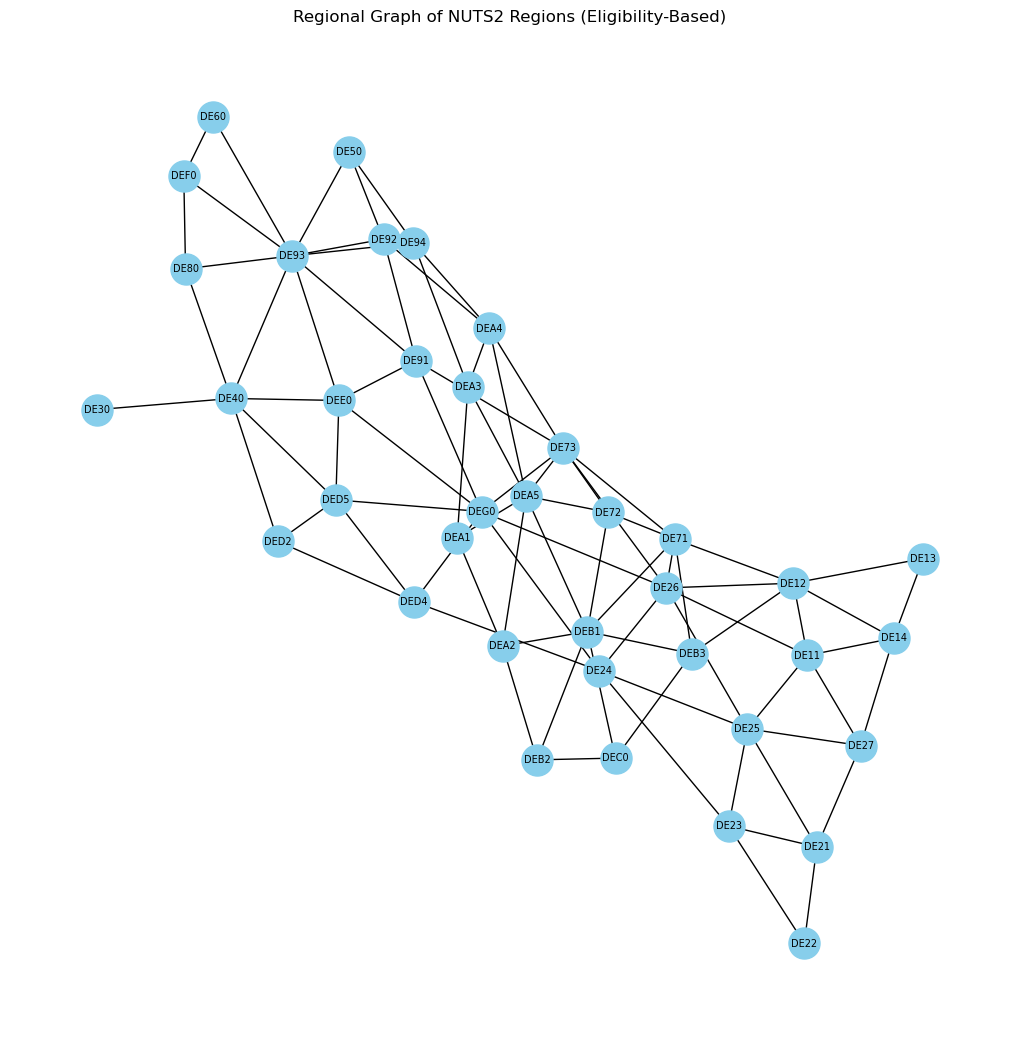

In [44]:
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=500, node_color='skyblue',font_size=7)
plt.title('Regional Graph of NUTS2 Regions (Eligibility-Based)')
plt.show()

In [45]:
# Add weights to the edges based on distances
for i in regions:
    for j in regions:
        if i != j and eligibility_df.loc[i, j] == 1:
            distance = distance_df.loc[i, j]
            G.add_edge(i, j, weight=distance, distance_km=distance)

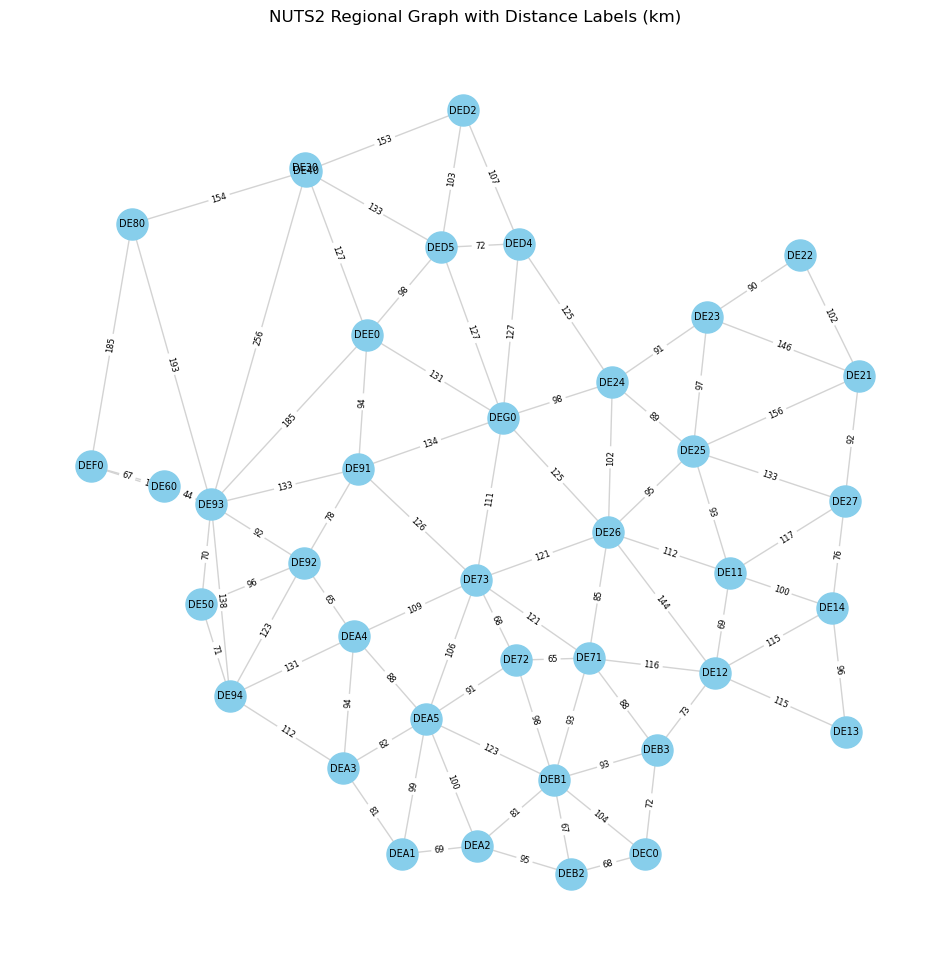

In [46]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(12, 12))
pos = nx.kamada_kawai_layout(G, weight='weight', scale=3)

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=7)

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='lightgray')

# Prepare edge labels (rounded to 0 decimal places for readability)
edge_labels = {(u, v): f"{d['weight']:.0f}" for u, v, d in G.edges(data=True)}

# Draw edge labels (distance in km)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

plt.title('NUTS2 Regional Graph with Distance Labels (km)')
plt.axis('off')
plt.show()


#### Draw Graph Structure with Shapefiles

<Figure size 1200x1200 with 0 Axes>

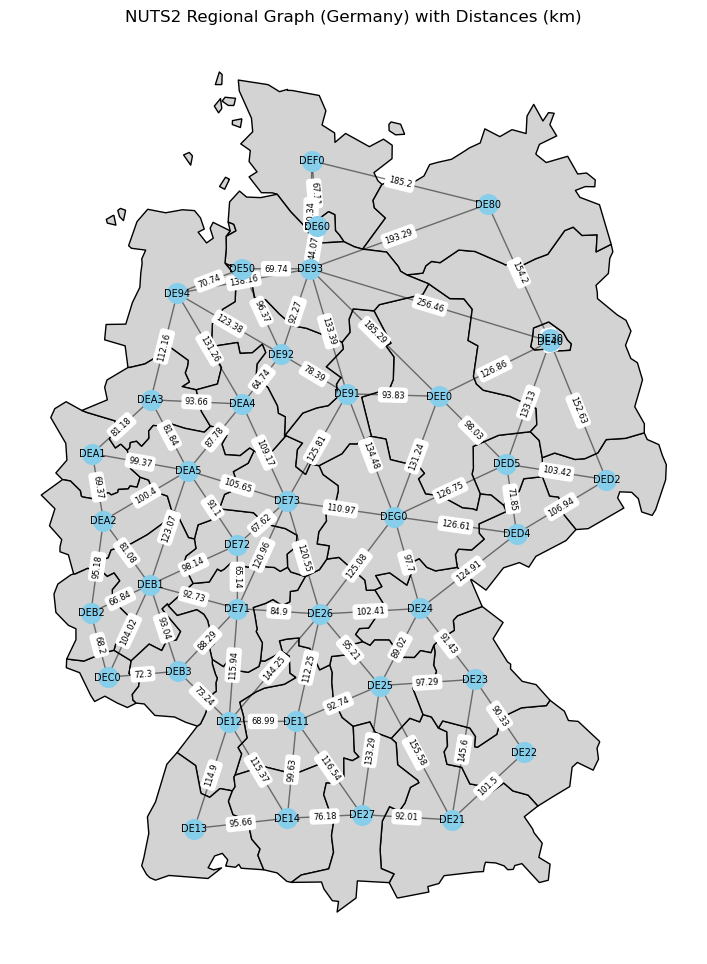

In [47]:
# Load the NUTS2 shapefile using GeoPandas
shapefile_path = '/Users/kevin/OneDrive - University of Adelaide/MAIML/7209 Big Data Analysis and Project/Robust-Capacity-Expansion-main/InputData/Shapefiles/DENUTS2.shp'
nuts2_gdf = gpd.read_file(shapefile_path)

nuts2_gdf = nuts2_gdf.set_index('index')

# Calculate centroid coordinates for all regions
nuts2_gdf['centroid'] = nuts2_gdf.geometry.centroid

# Create a position dictionary for the graph (only for nodes in G)
# This will be used for plotting the graph on the map
pos = {region: (row.centroid.x, row.centroid.y) for region, row in nuts2_gdf.iterrows() if region in G.nodes}

# Plot the map with NetworkX
plt.figure(figsize=(12, 12))
ax = nuts2_gdf.plot(color='lightgray', edgecolor='black', figsize=(12, 12))

# Draw the graph on the map
nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.5)

# Draw the edge labels (distances)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, ax=ax, node_color='skyblue', node_size=200)
nx.draw_networkx_labels(G, pos, ax=ax, font_size=7)

plt.title('NUTS2 Regional Graph (Germany) with Distances (km)')
plt.axis('off')
plt.show()


### 4. Explorative Data Analysis

#### 4.1 Univariate Analysis

In [48]:
# Group by region and calculate mean and standard deviation for each energy type
region_stats = energy_df.groupby('region')[['pv', 'wind_onshore', 'wind_offshore']].agg(['mean', 'std'])

# Display top 5 regions with the highest average PV generation
region_stats['pv'].sort_values('mean', ascending=False).head()

,mean,std
region,,
DE27,0.139080,0.202326
DE14,0.137984,0.200968
DE13,0.137621,0.201956
DE21,0.136207,0.198750
DE22,0.134850,0.198121


In [49]:
# Display top 5 regions with the highest average wind onshore generation
region_stats['wind_onshore'].sort_values('mean', ascending=False).head()

,mean,std
region,,
DEF0,0.317628,0.247526
DE94,0.271380,0.231448
DE80,0.241497,0.212287
DE50,0.224339,0.210374
DE93,0.196247,0.193305


##### Which regions have the highest capacity factors for PV? 

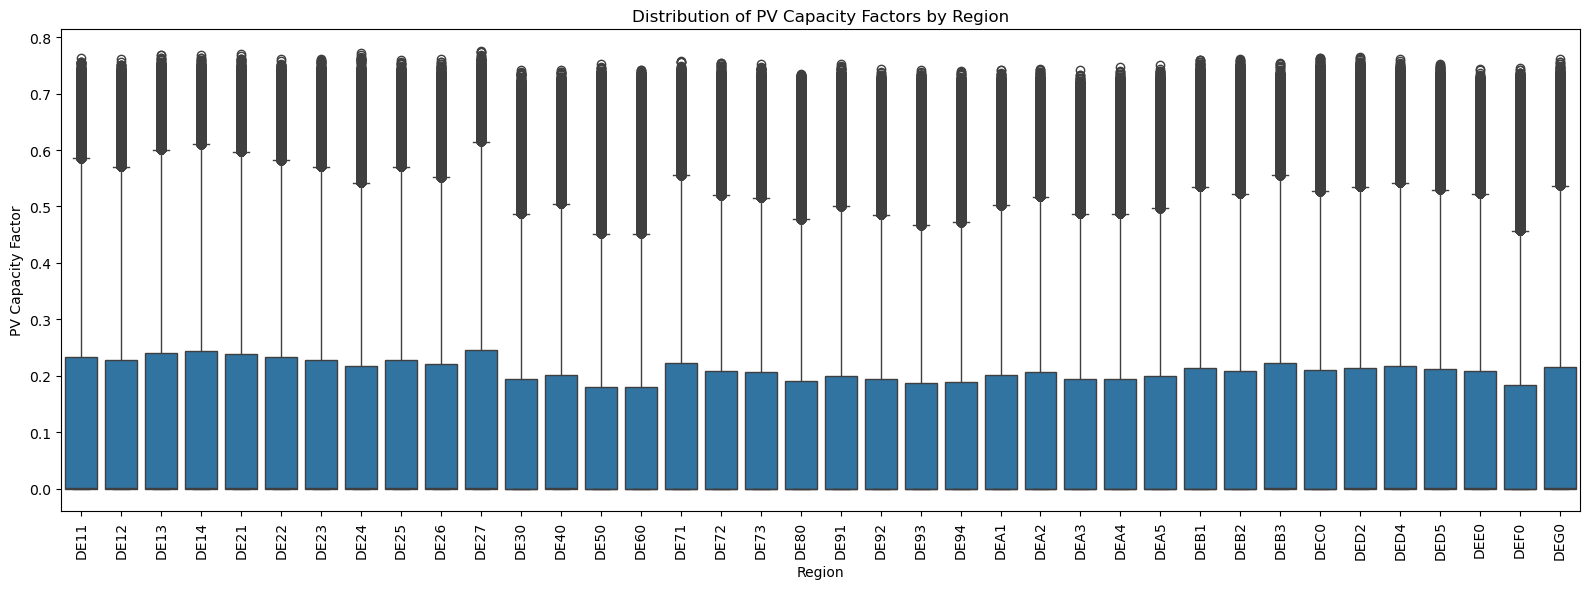

In [50]:
# Boxplot: PV capacity factor per region
plt.figure(figsize=(16, 6))
sns.boxplot(data=energy_df, x='region', y='pv')
plt.xticks(rotation=90)
plt.title('Distribution of PV Capacity Factors by Region')
plt.ylabel('PV Capacity Factor')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

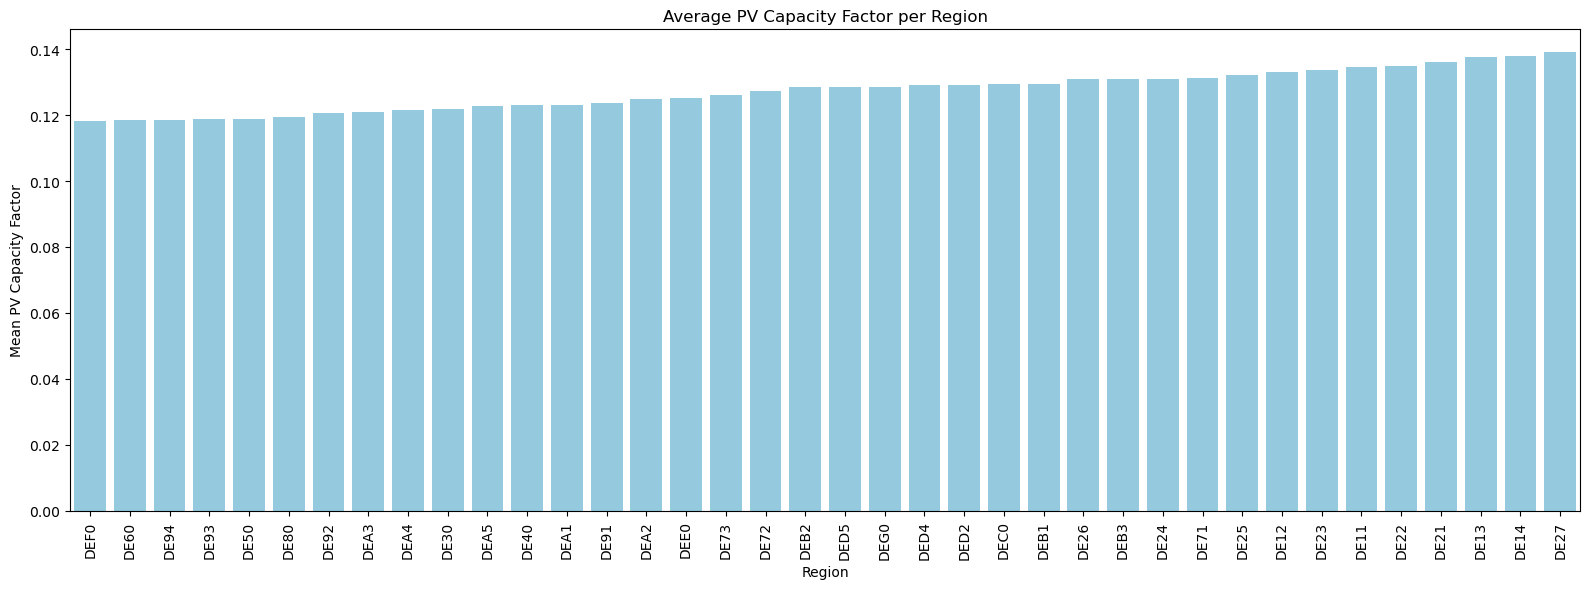

In [51]:
# Barplot: Mean PV capacity factor per region
mean_pv = energy_df.groupby('region')['pv'].mean().sort_values()
plt.figure(figsize=(16, 6))
sns.barplot(x=mean_pv.index, y=mean_pv.values, color='skyblue')
plt.xticks(rotation=90)
plt.title('Average PV Capacity Factor per Region')
plt.ylabel('Mean PV Capacity Factor')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

##### Which regions have the highest capacity factors for onshore wind? 

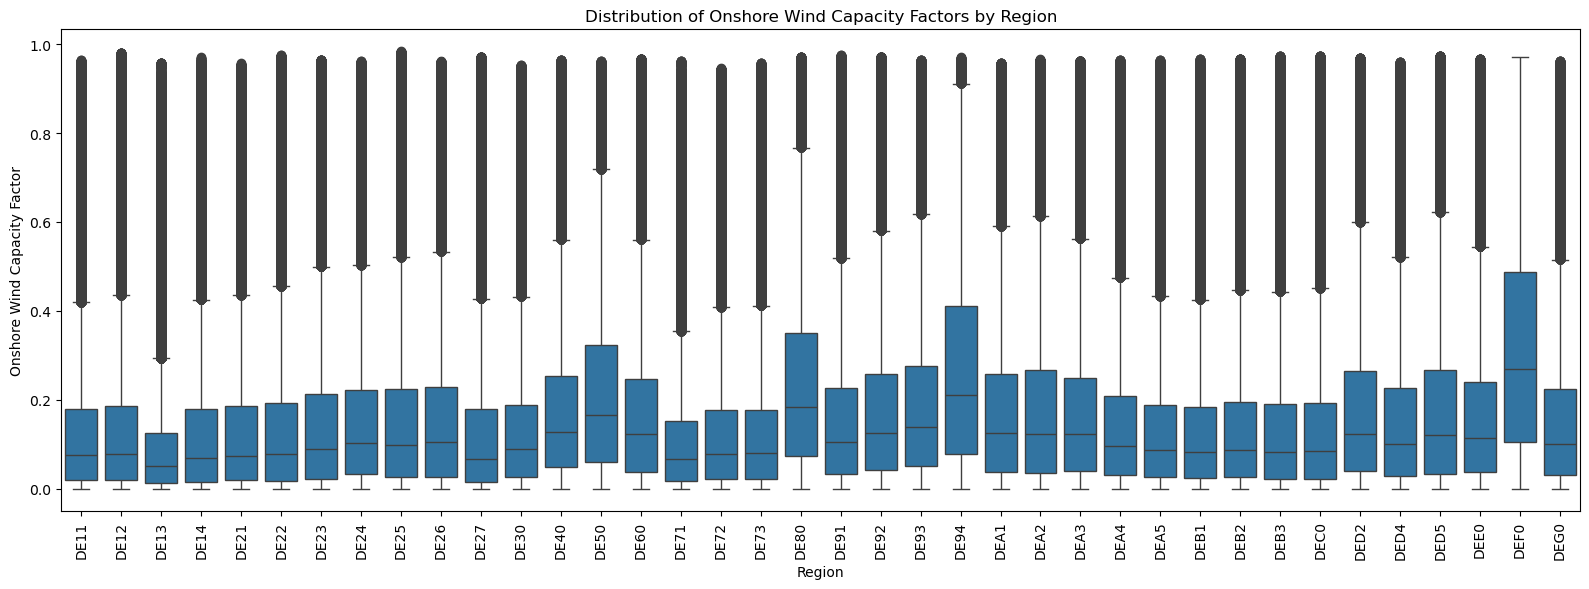

In [52]:
# Boxplot: Wind Onshore capacity factor per region
plt.figure(figsize=(16, 6))
sns.boxplot(data=energy_df, x='region', y='wind_onshore')
plt.xticks(rotation=90)
plt.title('Distribution of Onshore Wind Capacity Factors by Region')
plt.ylabel('Onshore Wind Capacity Factor')
plt.xlabel('Region')
plt.tight_layout()
plt.show()


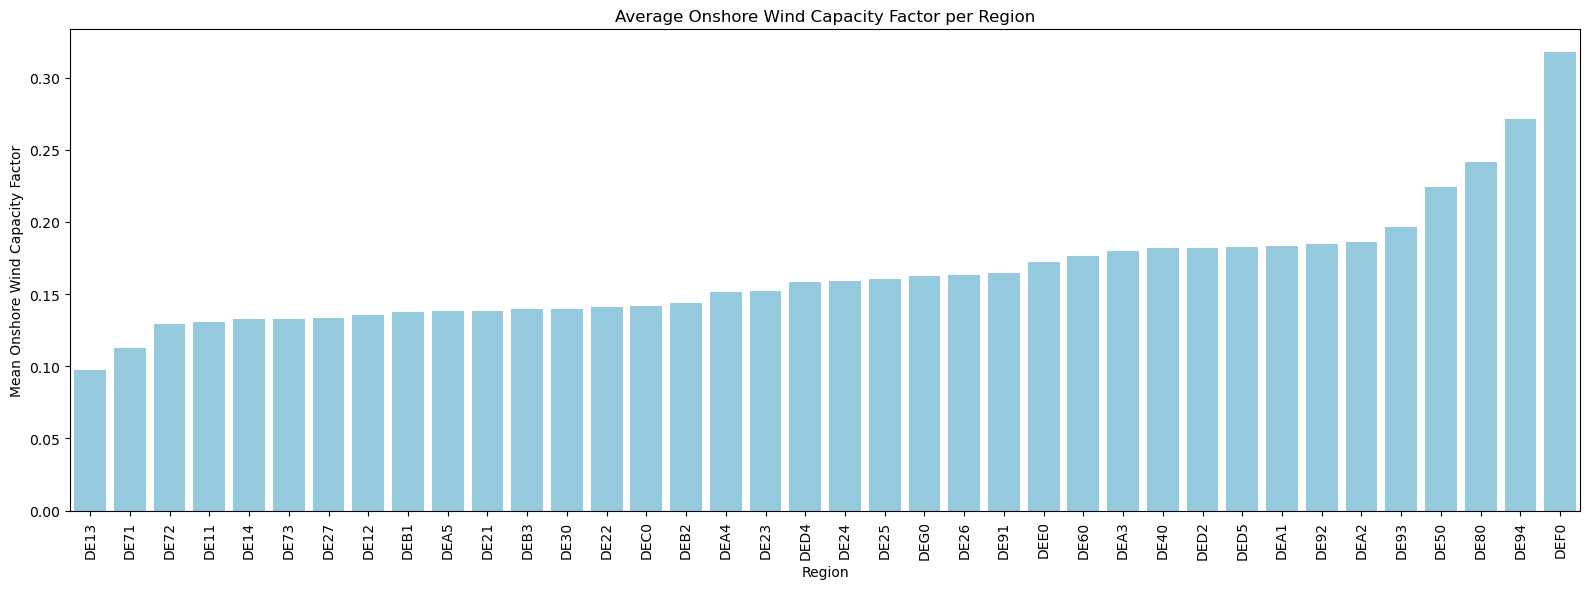

In [53]:
# Barplot: Mean Onshore Wind capacity factor per region
mean_wind = energy_df.groupby('region')['wind_onshore'].mean().sort_values()
plt.figure(figsize=(16, 6))
sns.barplot(x=mean_wind.index, y=mean_wind.values, color='skyblue')
plt.xticks(rotation=90)
plt.title('Average Onshore Wind Capacity Factor per Region')
plt.ylabel('Mean Onshore Wind Capacity Factor')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

##### Analysing seasonal peaks for the strongest PV region

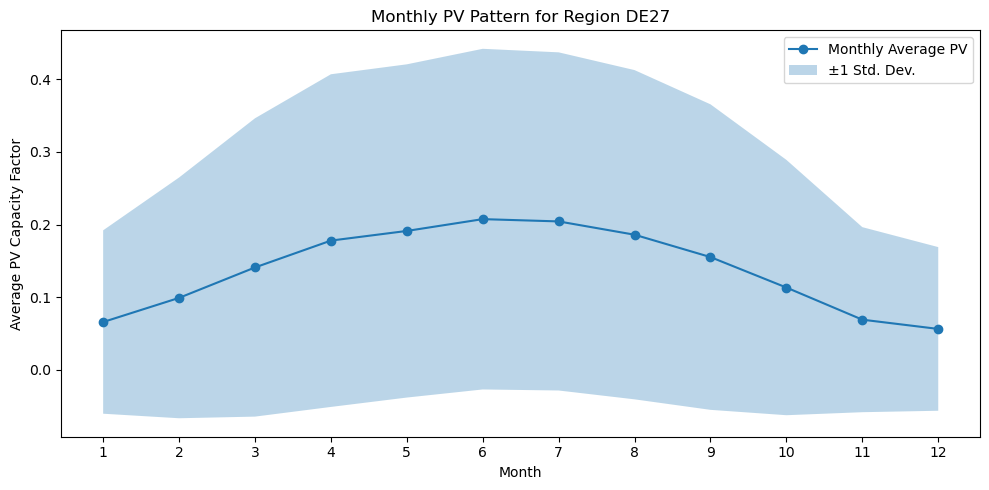

In [54]:
# Identify the region with the highest average PV capacity factor
top_pv_region = energy_df.groupby('region')['pv'].mean().idxmax()

df_pv_top = energy_df[energy_df['region'] == top_pv_region].copy()

df_pv_top['month'] = df_pv_top['timestamp'].dt.month
monthly_avg = df_pv_top.groupby('month')['pv'].mean()
monthly_std = df_pv_top.groupby('month')['pv'].std()

# Plotting the monthly average PV capacity factor for the top region
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', label='Monthly Average PV')
plt.fill_between(monthly_avg.index,
                 monthly_avg - monthly_std,
                 monthly_avg + monthly_std,
                 alpha=0.3, label='±1 Std. Dev.')
plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Average PV Capacity Factor')
plt.title(f'Monthly PV Pattern for Region {top_pv_region}')
plt.legend()
plt.tight_layout()
plt.show()

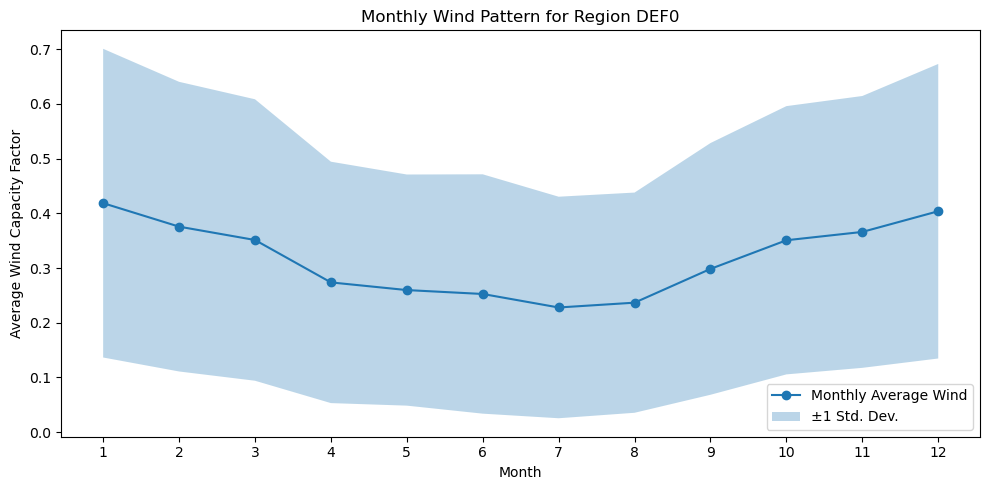

In [55]:
# Identify the region with the highest average Onshore Wind capacity factor
top_wind_region = energy_df.groupby('region')['wind_onshore'].mean().idxmax()

df_wind_top = energy_df[energy_df['region'] == top_wind_region].copy()
df_wind_top['month'] = df_wind_top['timestamp'].dt.month

monthly_avg = df_wind_top.groupby('month')['wind_onshore'].mean()
monthly_std = df_wind_top.groupby('month')['wind_onshore'].std()

# Plotting the monthly average Onshore Wind capacity factor for the top region
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', label='Monthly Average Wind')
plt.fill_between(monthly_avg.index,
                 monthly_avg - monthly_std,
                 monthly_avg + monthly_std,
                 alpha=0.3, label='±1 Std. Dev.')
plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Average Wind Capacity Factor')
plt.title(f'Monthly Wind Pattern for Region {top_wind_region}')
plt.legend()
plt.tight_layout()
plt.show()

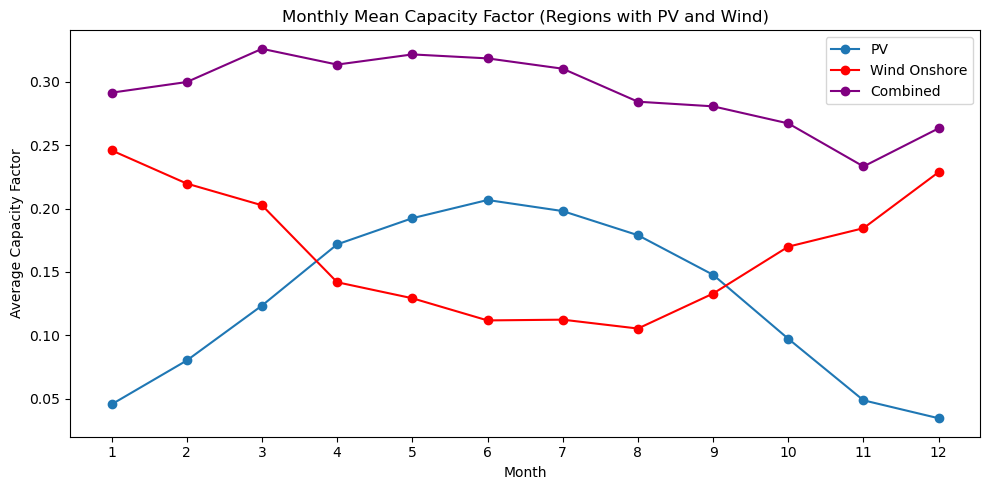

In [56]:
# Adding month column to the energy_df for monthly aggregation
energy_df['month'] = energy_df['timestamp'].dt.month

# Filter regions with both PV and Wind Onshore data
regions_wind_pv = energy_df.groupby('region')[['pv', 'wind_onshore']].count()
regions_wind_pv = regions_wind_pv[(regions_wind_pv['pv'] > 0) & (regions_wind_pv['wind_onshore'] > 0)].index

# Only keep regions with both data
df_filtered = energy_df[energy_df['region'].isin(regions_wind_pv)].copy()

# Combine PV and Wind Onshore data
df_filtered['combined'] = df_filtered['pv'] + df_filtered['wind_onshore']

# Monthly aggregation
monthly_avg = df_filtered.groupby('month')[['pv', 'wind_onshore', 'combined']].mean()

# Plotting the monthly average capacity factors for regions with both PV and Wind Onshore data
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg['pv'], marker='o', label='PV')
plt.plot(monthly_avg.index, monthly_avg['wind_onshore'], marker='o', label='Wind Onshore', color='red')
plt.plot(monthly_avg.index, monthly_avg['combined'], marker='o', label='Combined', color='purple')
plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Average Capacity Factor')
plt.title('Monthly Mean Capacity Factor (Regions with PV and Wind)')
plt.legend()
plt.tight_layout()
plt.show()


#### 4.2 Bivariate Analysis

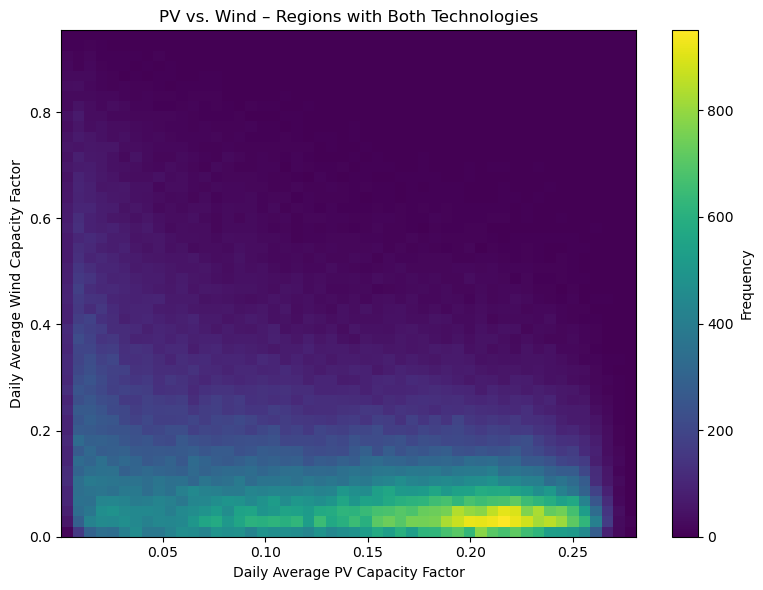

In [57]:
# Filter regions with both PV and Wind Onshore data
regions_with_both = energy_df.groupby('region')[['pv', 'wind_onshore']].apply(lambda x: x.notna().all().all())
valid_regions = regions_with_both[regions_with_both].index
df_both = energy_df[energy_df['region'].isin(valid_regions)].copy()

# Aggregate daily averages for PV and Wind Onshore
df_both['date'] = df_both['timestamp'].dt.date
daily_avg = df_both.groupby(['region', 'date'])[['pv', 'wind_onshore']].mean().reset_index()

# Plotting the histogram of daily average PV and Wind Onshore capacity factors
plt.figure(figsize=(8, 6))
plt.hist2d(daily_avg['pv'], daily_avg['wind_onshore'], bins=50, cmap='viridis')
plt.colorbar(label='Frequency')
plt.xlabel('Daily Average PV Capacity Factor')
plt.ylabel('Daily Average Wind Capacity Factor')
plt.title('PV vs. Wind – Regions with Both Technologies')
plt.tight_layout()
plt.show()


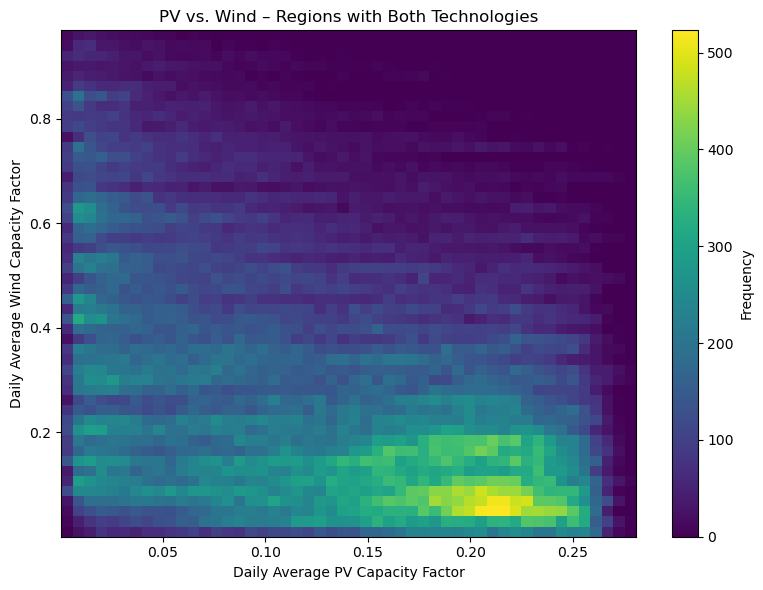

In [58]:
# Filter regions with both PV and Wind Offshore data
regions_with_both = energy_df.groupby('region')[['pv', 'wind_offshore']].apply(lambda x: x.notna().all().all())
valid_regions = regions_with_both[regions_with_both].index
df_both = energy_df[energy_df['region'].isin(valid_regions)].copy()

# Aggregate daily averages for PV and Wind Offshore
df_both['date'] = df_both['timestamp'].dt.date
daily_avg = df_both.groupby(['region', 'date'])[['pv', 'wind_offshore']].mean().reset_index()

# Plotting the histogram of daily average PV and Wind Offshore capacity factors
plt.figure(figsize=(8, 6))
plt.hist2d(daily_avg['pv'], daily_avg['wind_offshore'], bins=50, cmap='viridis')
plt.colorbar(label='Frequency')
plt.xlabel('Daily Average PV Capacity Factor')
plt.ylabel('Daily Average Wind Capacity Factor')
plt.title('PV vs. Wind – Regions with Both Technologies')
plt.tight_layout()
plt.show()


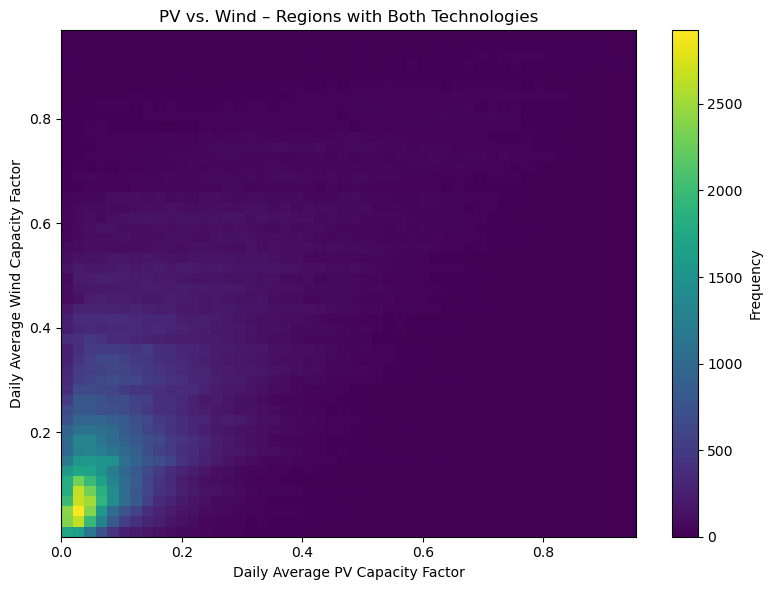

In [59]:
# Filter regions with both Wind Onshore and Wind Offshore data
regions_with_both = energy_df.groupby('region')[['wind_onshore', 'wind_offshore']].apply(lambda x: x.notna().all().all())
valid_regions = regions_with_both[regions_with_both].index
df_both = energy_df[energy_df['region'].isin(valid_regions)].copy()

# Aggregate daily averages for Wind Onshore and Wind Offshore
df_both['date'] = df_both['timestamp'].dt.date
daily_avg = df_both.groupby(['region', 'date'])[['wind_onshore', 'wind_offshore']].mean().reset_index()

# Plotting the histogram of daily average Wind Onshore and Wind Offshore capacity factors
plt.figure(figsize=(8, 6))
plt.hist2d(daily_avg['wind_onshore'], daily_avg['wind_offshore'], bins=50, cmap='viridis')
plt.colorbar(label='Frequency')
plt.xlabel('Daily Average PV Capacity Factor')
plt.ylabel('Daily Average Wind Capacity Factor')
plt.title('PV vs. Wind – Regions with Both Technologies')
plt.tight_layout()
plt.show()


#### 4.3 Multivariate Analysis

<Figure size 1200x1200 with 0 Axes>

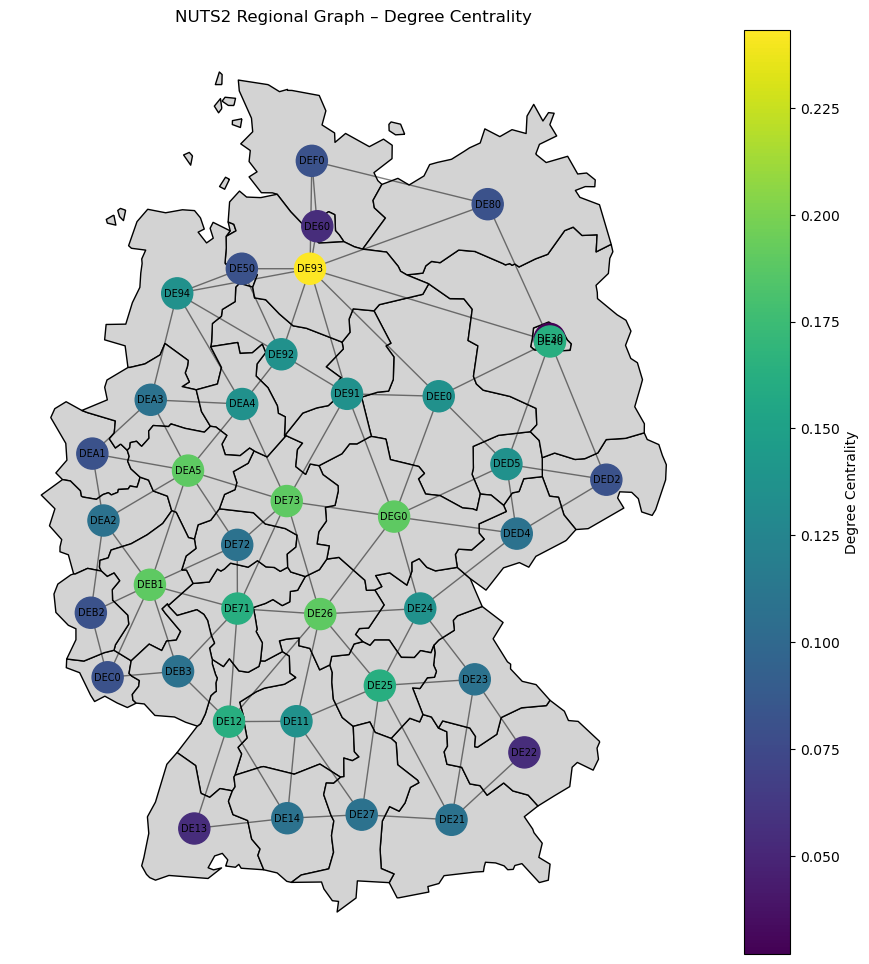

In [60]:
# Degree Centrality
centrality_values = nx.degree_centrality(G)
node_colors = [centrality_values[node] for node in G.nodes()]

# Plotting the NUTS2 regions with degree centrality
plt.figure(figsize=(12, 12))
ax = nuts2_gdf.plot(color='lightgray', edgecolor='black', figsize=(12, 12))

nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.5)

nodes = nx.draw_networkx_nodes(
    G, pos, ax=ax,
    node_color=node_colors,
    node_size=500,
    cmap=cm.viridis
)

nx.draw_networkx_labels(G, pos, ax=ax, font_size=7)

sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm._A = []
plt.colorbar(sm, ax=ax, label="Degree Centrality")

plt.title('NUTS2 Regional Graph – Degree Centrality')
plt.axis('off')
plt.show()


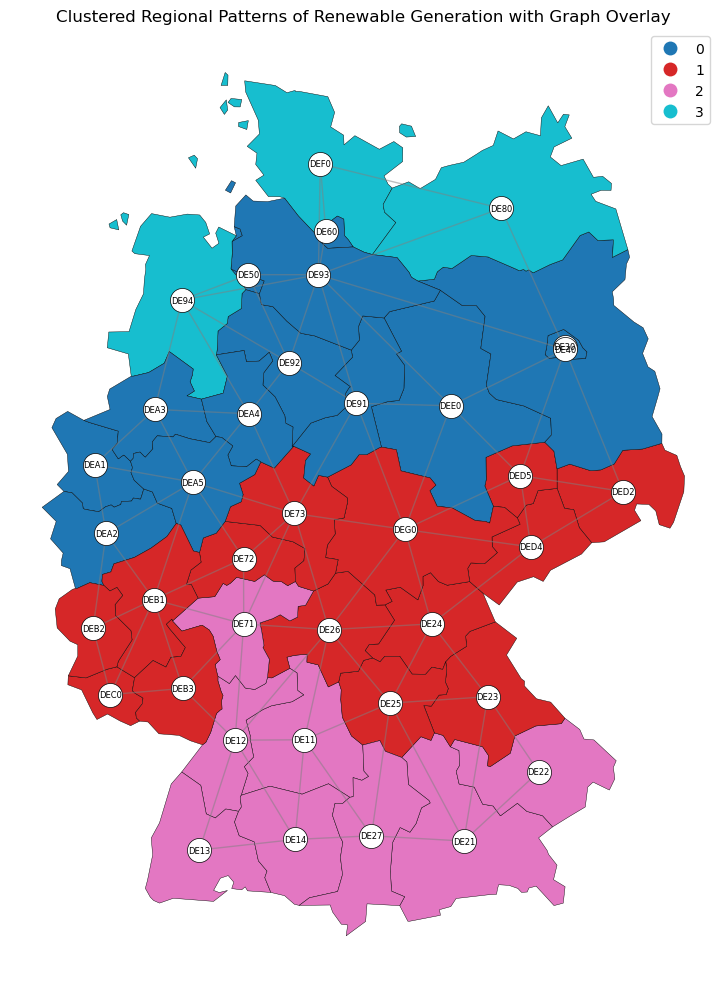

In [61]:
# 1. Compute monthly mean per region for all renewable types
monthly_avg = energy_df.groupby(['region', 'month'])[['pv', 'wind_onshore', 'wind_offshore']].mean().reset_index()

# 2. Pivot table: each region becomes a row, and each (tech, month) becomes a column
pivot_df = monthly_avg.pivot(index='region', columns='month')
pivot_df.columns = [f"{var}_month{month}" for var, month in pivot_df.columns]
pivot_df = pivot_df.reset_index()

# 3. Preprocess for PCA: standardise features and run PCA
features = pivot_df.drop(columns='region')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# 4. Apply k-means clustering on PCA-reduced data
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)

# 5. Create result dataframe with PCA coordinates and cluster labels
result_df = pd.DataFrame({
    'region': pivot_df['region'],
    'PCA1': pca_result[:, 0],
    'PCA2': pca_result[:, 1],
    'cluster': cluster_labels
})

# 6. Load shapefile and merge with PCA/cluster results
gdf = gpd.read_file(shapefile_path).set_index("index")
gdf = gdf.merge(result_df.set_index("region"), left_index=True, right_index=True)

# 7. Define node positions for plotting (using region centroids)
gdf['centroid'] = gdf.geometry.centroid
pos = {region: (row.centroid.x, row.centroid.y) for region, row in gdf.iterrows() if region in G.nodes}

# 8. Visualise the spatial clusters together with the graph overlay
fig, ax = plt.subplots(figsize=(10, 10))

# 8.1 Colour regions by cluster label
gdf.plot(
    column='cluster',
    cmap='tab10',
    legend=True,
    categorical=True,
    ax=ax,
    edgecolor='black',
    linewidth=0.3
)

# 8.2 Overlay graph: edges and nodes
nx.draw_networkx_edges(G, pos, ax=ax, edge_color='gray', alpha=0.5)
nx.draw_networkx_nodes(G, pos, ax=ax, node_size=300, node_color='white', edgecolors='black', linewidths=0.5)
nx.draw_networkx_labels(G, pos, ax=ax, font_size=6)

ax.set_title("Clustered Regional Patterns of Renewable Generation with Graph Overlay")
ax.axis("off")
plt.tight_layout()
plt.show()


In [78]:
demand_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2050-01-01 00:00:00 to 2050-12-31 23:00:00
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DE11    8760 non-null   float64
 1   DE12    8760 non-null   float64
 2   DE13    8760 non-null   float64
 3   DE14    8760 non-null   float64
 4   DE21    8760 non-null   float64
 5   DE22    8760 non-null   float64
 6   DE23    8760 non-null   float64
 7   DE24    8760 non-null   float64
 8   DE25    8760 non-null   float64
 9   DE26    8760 non-null   float64
 10  DE27    8760 non-null   float64
 11  DE30    8760 non-null   float64
 12  DE40    8760 non-null   float64
 13  DE50    8760 non-null   float64
 14  DE60    8760 non-null   float64
 15  DE71    8760 non-null   float64
 16  DE72    8760 non-null   float64
 17  DE73    8760 non-null   float64
 18  DE80    8760 non-null   float64
 19  DE91    8760 non-null   float64
 20  DE92    8760 non-null   float64
 21  D

In [77]:
# Export demand_df to CSV
demand_df.to_csv('/Users/kevin/Downloads/demand_data.csv', index=True, index_label='timestamp')
# Export energy_df to CSV
energy_df.to_csv('/Users/kevin/Downloads/energy_data.csv', index=True)
# Export the distance_df to CSV
distance_df.to_csv('/Users/kevin/Downloads/distance_data.csv', index=True)
# Export the eligibility_df to CSV
eligibility_df.to_csv("/Users/kevin/Downloads/eligibility_data.csv", index=True)